# Lab | Random Forests

Instructions

• Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.

• Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)

• Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.

• Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [35]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
target = pd.read_csv('target.csv')

data = pd.concat([categorical,numerical,target],axis=1)

In [36]:
data

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,L,E,C,T,2,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,CA,14,H,M,3,L,G,A,S,1,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,NC,43,U,M,3,L,E,C,R,2,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,CA,44,U,F,3,L,E,C,R,2,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,FL,16,H,F,3,L,F,A,S,2,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,25.0,25.0,9,25.000000,184568,0,1,12,0,0.0
95408,TX,24,H,M,3,L,F,A,C,1,...,20.0,20.0,9,20.000000,122706,1,1,2,0,0.0
95409,MI,30,H,M,3,L,E,B,C,3,...,10.0,10.0,3,8.285714,189641,1,3,34,0,0.0
95410,CA,24,H,F,2,L,F,A,C,1,...,21.0,18.0,4,12.146341,4693,1,4,11,1,18.0


In [37]:
target_d = data[data['TARGET_D']!=0]

In [38]:
nulls = [column for column in data if data[column].isna().sum() > 0]
nulls

[]

In [39]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [40]:
# Split the dataset into two classes
no_donate = data[data['TARGET_B'] == 0]
yes_donate = data[data['TARGET_B'] == 1]

In [41]:
# Oversample the minority class to match the majority class
yes_donate_oversampled = resample(yes_donate, 
                                    replace=True,
                                    n_samples=len(no_donate),
                                    random_state=42)

In [42]:
# Display the shapes of the original and oversampled datasets
display(no_donate.shape)
display(yes_donate_oversampled.shape)

(90569, 339)

(90569, 339)

In [43]:
# Concatenate the oversampled minority class with the majority class to create the balanced dataset
oversampled = pd.concat([no_donate, yes_donate_oversampled])

**X-Y Split + Training Split**

In [44]:
# X-Y Split
X = oversampled.drop(['TARGET_B', 'TARGET_D'], axis=1)
y = oversampled['TARGET_B']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# Separate numerical and categorical features in X_train
X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(include=object)

In [46]:
# Separate numerical and categorical features in X_test
X_test_num = X_test.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(include=object)

In [47]:
# Scale X_train numerical features
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)

# Scale X_test numerical features using the same transformer
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns)

In [15]:
X_scaled_test

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.182838,0.626022,0.159428,0.531017,-0.029559,-1.320474,-0.311571,1.334569,-0.617088,0.963573,...,-0.329634,0.286884,0.237411,0.623210,-0.444501,0.537244,1.554770,-0.998298,0.829085,-1.159685
1,-0.000362,0.626022,0.159428,1.112893,-0.029559,-1.320474,-0.311571,0.960959,-0.099493,0.412726,...,-0.964663,0.832180,-0.167817,-0.092231,0.148719,0.218165,-0.954379,-0.998298,-0.949825,-0.947620
2,-1.392363,-0.973903,1.535152,-0.050858,-0.029559,0.994498,2.598269,-0.159871,1.194494,0.412726,...,-0.752987,0.286884,0.237411,0.623210,0.593634,0.386909,0.868392,-0.998298,-0.949825,-0.152375
3,0.138838,0.626022,1.535152,1.403831,-0.029559,-1.320474,-0.311571,1.334569,-1.393481,0.963573,...,-0.964663,1.377477,0.034797,0.265490,0.148719,0.678375,1.082045,-0.998298,-0.949825,1.013985
4,-0.000362,-2.573828,0.159428,-0.050858,-0.029559,0.346306,-0.634886,-0.159871,0.676899,0.412726,...,-0.964663,0.286884,-0.127294,-0.020687,-1.186026,-0.057962,-1.699336,-0.998298,-0.949825,-1.053652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54337,1.113238,0.626022,0.159428,-1.505548,-0.029559,-1.320474,-0.311571,1.334569,-1.393481,0.412726,...,2.633833,-0.258413,-0.370430,-0.807672,-0.444501,-0.677155,-1.219564,-0.998298,1.718541,-1.530799
54338,1.391639,0.626022,0.159428,-0.923672,-0.029559,-1.320474,-0.311571,-0.533481,0.935697,-0.138120,...,0.093718,-0.476531,-0.167817,-0.163775,2.224989,-0.426131,0.260573,-0.998298,-0.949825,1.491132
54339,1.391639,-0.973903,0.159428,-0.923672,-0.029559,-1.320474,-0.311571,-0.907091,-0.358291,-2.341506,...,0.305394,-0.694650,0.034797,-0.449952,0.297024,-0.173015,0.771088,-0.998298,-0.060370,1.491132
54340,1.252439,0.626022,0.159428,-1.505548,-0.029559,-0.301886,0.981691,-0.159871,0.935697,0.963573,...,0.728747,-0.258413,-0.137425,-0.038573,-0.444501,-0.266974,1.406762,1.001705,0.829085,1.491132


**OneHot Encode the categorical columns**

In [48]:
# Initialize the encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

# Perform one-hot encoding on the training data
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

# Perform one-hot encoding on the testing data
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)

In [49]:
# Combine the encoded data with the scaled data for both training and testing sets
train_combined = pd.concat([encoded_train, X_scaled_train], axis=1)
test_combined = pd.concat([encoded_test, X_scaled_test], axis=1)

# Convert all column labels to strings to avoid mixed types
train_combined.columns = train_combined.columns.astype(str)
test_combined.columns = test_combined.columns.astype(str)

In [50]:
# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=20)
clf.fit(train_combined, y_train)

# Evaluate the model on both the training and testing sets
print(f'Training score: {clf.score(train_combined, y_train)}')
print(f'Test score: {clf.score(test_combined, y_test)}')

Training score: 0.6141124325688507
Test score: 0.6119207979095359


In [51]:
# Perform cross-validation to evaluate the model's performance
cross_val_scores = cross_val_score(clf, train_combined, y_train, cv=10)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {np.mean(cross_val_scores)}')

Cross-validation scores: [0.60315457 0.60749211 0.60678233 0.61190852 0.61656151 0.61317035
 0.60966953 0.61156243 0.61463838 0.6137708 ]
Mean cross-validation score: 0.6108710539521994


Accuracy: 0.6119207979095359
Precision: 0.6193134666163712
Recall: 0.5988692321721685
F1 Score: 0.608919796012981


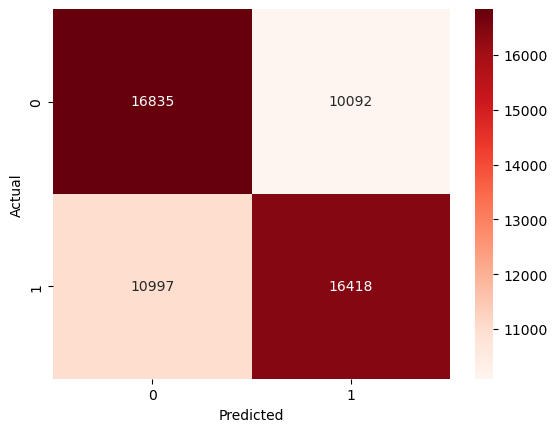

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the model
pred_RF = clf.predict(test_combined)

# Calculate and display various performance metrics
print(f'Accuracy: {accuracy_score(y_test, pred_RF)}')
print(f'Precision: {precision_score(y_test, pred_RF)}')
print(f'Recall: {recall_score(y_test, pred_RF)}')
print(f'F1 Score: {f1_score(y_test, pred_RF)}')

# Calculate the confusion matrix and plot it using seaborn
cm = confusion_matrix(y_test, pred_RF)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [53]:
round(target_d['TARGET_D'].mean(),2)

15.62

In [56]:
# Calculate and display financial metrics
donation_gained = 16418 * 15.62
donation_lost = 10092 * 15.62


print(f'Donation amount gained through correctly predicted donators: {round(donation_gained, 2)}')
print(f'Donation amount lost through falsely predicted donators: {round(donation_lost, 2)}')

Donation amount gained through correctly predicted donators: 256449.16
Donation amount lost through falsely predicted donators: 157637.04


In the plot above, we can see that 10,997 people actually would donate, even though the models say the would not. On the contrary, we see 10,092 people that actually do not donate, even though we predicted them to do so. We see that we lost around € 157,637.04 of donations by not correctly spending our marketing money. 

We have to look for a way to improve our model. Perhaps through a GridSearch or Random Search